In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("FilteredDataset.csv")
df

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,PREPAYMENT_AMT,Previous_UPB,Remaining MFM
0,97473062,12020,2,4.120,4.120,454000.0,450125.35,360,62019,82019,...,0,8.1,2.3,2.5,2198.991139,651.32,1547.666567,11.062194,450776.67,353
1,97473062,22020,2,4.120,4.120,454000.0,449471.79,360,62019,82019,...,0,8.1,2.3,2.3,2198.991139,653.56,1545.430368,13.302194,450125.35,352
2,97473062,32020,2,4.120,4.120,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,1.5,2198.991139,655.80,1543.186479,15.542194,449471.79,351
3,97473062,42020,2,4.120,4.120,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.3,2198.991139,0.00,1540.934899,0.000000,448815.99,350
4,97473062,52020,2,4.120,4.120,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.1,2198.991139,0.00,1540.934899,0.000000,448815.99,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101382,999901768643,32019,2,3.625,3.625,226000.0,206555.78,240,92016,112016,...,0,3.7,2.7,1.9,1325.271935,699.19,626.082722,56.626398,207254.97,210
1101383,999901768643,42019,2,3.625,3.625,226000.0,205854.48,240,92016,112016,...,0,3.7,2.7,2.0,1325.271935,701.30,623.970585,58.736398,206555.78,209
1101384,999901768643,52019,2,3.625,3.625,226000.0,205151.06,240,92016,112016,...,0,3.7,2.7,1.8,1325.271935,703.42,621.852075,60.856398,205854.48,208
1101385,999901768643,62019,2,3.625,3.625,226000.0,204445.52,240,92016,112016,...,0,3.7,2.7,1.6,1325.271935,705.54,619.727160,62.976398,205151.06,207


In [3]:
df.drop(['Loan Identifier','EMI','UPB_diff','Interest_Component','PREPAYMENT_AMT','Remaining Months To Maturity'], axis=1, inplace = True)

In [4]:
df.columns

Index(['Monthly Reporting Period', 'Channel', 'Original Interest Rate',
       'Current Interest Rate', 'Original UPB', 'Current Actual UPB',
       'Original Loan Term', 'Origination Date', 'First Payment Date',
       'Original Loan to Value Ratio (LTV)', 'Debt-To-Income (DTI)',
       'Borrower Credit Score at Origination',
       'First Time Home Buyer Indicator', 'Loan Purpose', 'Property Type',
       'Number of Units', 'Occupancy Status',
       'Metropolitan Statistical Area (MSA)', 'Zip Code Short',
       'Interest Only Loan Indicator', 'Current Loan Delinquency Status',
       'Modification Flag', 'Zero Balance Code', 'Special Eligibility Program',
       'Property Valuation Method', 'High Balance Loan Indicator',
       'Unemployment_rate', 'Divorce_rate', 'Inflation_rate', 'Previous_UPB',
       'Remaining MFM'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df.drop(['Current Actual UPB'],axis=1)
y = df['Current Actual UPB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881109 entries, 1092233 to 823860
Data columns (total 30 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Monthly Reporting Period              881109 non-null  int64  
 1   Channel                               881109 non-null  int64  
 2   Original Interest Rate                881109 non-null  float64
 3   Current Interest Rate                 881109 non-null  float64
 4   Original UPB                          881109 non-null  float64
 5   Original Loan Term                    881109 non-null  int64  
 6   Origination Date                      881109 non-null  int64  
 7   First Payment Date                    881109 non-null  int64  
 8   Original Loan to Value Ratio (LTV)    881109 non-null  int64  
 9   Debt-To-Income (DTI)                  881109 non-null  float64
 10  Borrower Credit Score at Origination  881109 non-null  float64

In [7]:
X_train

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),Debt-To-Income (DTI),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
1092233,12003,1,8.000,8.000,66000.0,180,32000,52000,68,27.0,...,0,0,0,4,0,6.0,3.8,2.6,59456.19,146
193622,72006,2,5.875,5.875,156000.0,180,42002,62002,72,23.0,...,0,0,0,4,0,4.6,3.7,4.1,126059.70,129
760055,112017,1,3.125,3.125,165000.0,180,52016,72016,70,35.0,...,0,0,0,4,0,4.4,2.9,2.2,152792.46,162
800178,82006,2,6.500,6.500,94000.0,360,12004,32004,69,17.0,...,0,0,0,4,0,4.6,3.7,3.8,90694.49,329
388456,62009,2,6.500,6.500,179000.0,360,122005,22006,62,50.0,...,0,0,0,4,0,9.3,3.5,-1.4,171794.30,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276651,32020,2,4.250,4.250,61000.0,180,22018,42018,80,45.0,...,0,0,0,0,0,8.1,2.3,1.5,55099.60,155
165885,92020,1,4.250,4.250,135000.0,360,52012,72012,65,32.0,...,0,0,0,4,0,8.1,2.3,1.4,113254.77,260
701186,72012,0,4.500,4.500,100000.0,120,32010,52010,59,41.0,...,0,0,0,4,0,8.1,3.4,1.4,81973.36,92
151924,72010,1,5.500,5.500,263000.0,360,32004,52004,80,32.0,...,0,0,0,4,0,9.6,3.6,1.2,237551.30,284


In [8]:
y_train

1092233     59221.83
193622     125370.97
760055     152044.44
800178      90593.18
388456     171593.45
             ...    
276651      54833.86
165885     112991.76
701186      81244.38
151924     237146.79
823860     110681.92
Name: Current Actual UPB, Length: 881109, dtype: float64

In [9]:
Y_act_ep=[]
y_pred_ep=[]

rmse = []
mae = []
r2 = []

In [10]:
y_test

713822    100141.19
241059    256101.17
531276     98741.22
76457      95111.57
350669     55586.57
            ...    
977831    239837.75
878479    191726.00
911944     83374.07
83151     277389.38
88711     278076.43
Name: Current Actual UPB, Length: 220278, dtype: float64

In [11]:
import math
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score, mean_squared_error
class PerformanceCallback(keras.callbacks.Callback):
    def __init__(self, X_test_scaled, y_test):
        self.X_test_scaled= X_test_scaled
        self.y_test = y_test
    
    def eval(self, y_test, predictions):
        r2_val = r2_score(predictions,y_test)
        mae_val = mean_absolute_error(predictions,y_test)
        rmse_val = math.sqrt(mean_squared_error(predictions,y_test))
        print("R2 Score: ",r2_score(predictions,y_test))
        print("Mean Absolute Error: ",mean_absolute_error(predictions,y_test))
        print("Root Mean Square: ",math.sqrt(mean_squared_error(predictions,y_test)))
        r2.append(r2_val)
        mae.append(mae_val)
        rmse.append(rmse_val)

    def on_epoch_end(self,epoch,logs=None):
        print("\nEvaluating Model: ")
        print("Model Evaluation Epoch: ",epoch)
        self.eval(self.y_test,self.model.predict(X_test_scaled))

In [13]:
eval_callback = PerformanceCallback(X_test_scaled, y_test)

In [14]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_absolute_error', metrics = ['mae'])

In [15]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,callbacks=[eval_callback]) 

Epoch 1/100
27522/27535 [============================>.] - ETA: 0s - loss: 7466.6465 - mae: 7466.6465
Evaluating Model: 
Model Evaluation Epoch:  0
6884/6884 [==============================] - 9s 1ms/step
R2 Score:  0.9991976043684898
Mean Absolute Error:  475.8059366420435
Root Mean Square:  3078.236483927954
27535/27535 [==============================] - 63s 2ms/step - loss: 7463.3975 - mae: 7463.3975
Epoch 2/100
27525/27535 [============================>.] - ETA: 0s - loss: 412.2312 - mae: 412.2312
Evaluating Model: 
Model Evaluation Epoch:  1
6884/6884 [==============================] - 9s 1ms/step
R2 Score:  0.9992547182966429
Mean Absolute Error:  415.11932974988804
Root Mean Square:  2971.1439807096367
27535/27535 [==============================] - 62s 2ms/step - loss: 412.1993 - mae: 412.1993
Epoch 3/100
27518/27535 [============================>.] - ETA: 0s - loss: 360.3109 - mae: 360.3109
Evaluating Model: 
Model Evaluation Epoch:  2
6884/6884 [==============================]

In [16]:
predictions = model.predict(X_test_scaled)

6884/6884 [==============================] - 11s 2ms/step


In [17]:
train_evs, train_r2 = compute_metrics(y_test, predictions)

In [18]:
train_loss, train_rmse, train_mse, train_mae = model.evaluate(y_test, predictions, verbose=0)
print('Train RMSE:', train_rmse)
print('Train MSE:', train_mse)
print('Train MAE:', train_mae)
print('Train EVS:', train_evs)
print('Train R2 Score:', train_r2)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_4/Relu' defined at (most recent call last):
    File "c:\Users\shria\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\shria\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\shria\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\shria\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\shria\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\shria\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\shria\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\shria\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\shria\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\shria\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "c:\Users\shria\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "c:\Users\shria\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "c:\Users\shria\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "c:\Users\shria\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\shria\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\shria\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\shria\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\shria\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\shria\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\shria\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\shria\AppData\Local\Temp\ipykernel_22104\3057977875.py", line 1, in <cell line: 1>
      train_loss, train_rmse, train_mse, train_mae = model.evaluate(y_test, predictions, verbose=0)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\shria\anaconda3\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/dense_4/Relu'
Matrix size-incompatible: In[0]: [32,1], In[1]: [30,64]
	 [[{{node sequential_1/dense_4/Relu}}]] [Op:__inference_test_function_629539]

In [19]:
print(predictions)

[[383081.1  ]
 [ 94275.734]
 [174096.67 ]
 ...
 [187920.11 ]
 [115506.78 ]
 [ 48313.934]]


In [20]:
print(y_test)

437917     382805.15
957936      93275.17
579929     173988.03
1243852    201261.38
1156523     98857.74
             ...    
927787     519590.63
172657     134696.50
48076      188000.00
752045     115567.94
292412      48474.10
Name: Current Actual UPB, Length: 251294, dtype: float64


In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions, y_test)

286.76857907131387

In [18]:
from sklearn.metrics import r2_score
print(r2_score(predictions, y_test))

0.9992708889700749


In [19]:
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(predictions,y_test)))

2938.5373714770444


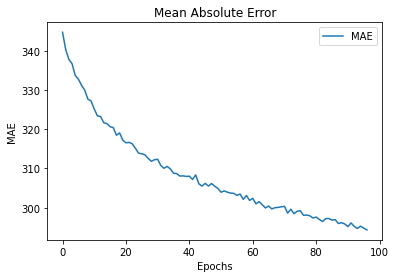

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][3:], label='MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

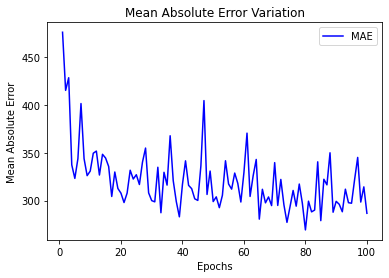

In [20]:
mae_values = mae
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae_values, 'b-', label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Variation')
plt.legend()
plt.show()


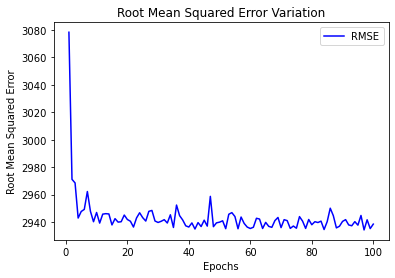

In [21]:
rmse_values = rmse  
epochs = range(1, len(rmse) + 1)
plt.plot(epochs, rmse_values, 'b-', label='RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error Variation')
plt.legend()
plt.show()

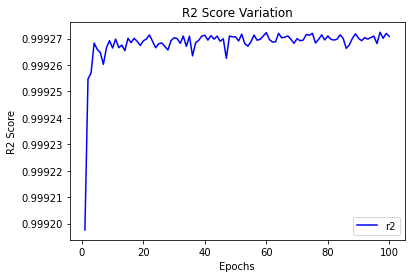

In [22]:
r2_values = r2  
epochs = range(1, len(r2) + 1)
plt.plot(epochs, r2_values, 'b-', label='r2')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score Variation')
plt.legend()
plt.show()

In [23]:
model.save("model_e100_filtered.h5")

In [24]:
import joblib
joblib.dump(scaler, 'scaler_filtered.joblib')

['scaler_filtered.joblib']